# References
This file was originally taken from [AI Tourist on youtube](https://www.youtube.com/watch?v=sdp49vTanSk&list=PLDJWPpm6CX5l2-0z-StGTcwzTx5ZCEY0x&index=33)
- [blog](https://www.viralml.com/video-content.html?fm=yt&v=sdp49vTanSk)
The main difference here is that I get the Price of SPY from yahoo rather than loading my own csv, however I do plan on expanded on this even further from chatting with GPT and other AI's about this document.

In [52]:
!pip install yfinance
clear_output()

# Creating Two Markov Chains, One for Days with Volume Jumps, and another for Volume Drops

In [38]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint
import requests

# Data Exploration

In [48]:
import yfinance as yf
import pandas as pd

# Download SPY data from Yahoo Finance
_SPY_DATA_ = yf.download('SPY', start='2010-01-01')

# Reset the index to move the date from the index to a column
_SPY_DATA_ = _SPY_DATA_.reset_index()

# Optional: If you want to start your index from a specific number, e.g., 15097
# First, reset the index to start from 0 as usual
_SPY_DATA_.reset_index(inplace=True)

# Then, adjust the index to start from your desired starting number
starting_index = 15097
_SPY_DATA_['index'] = _SPY_DATA_.index + starting_index

# Rename 'index' column to something more meaningful, if desired
_SPY_DATA_.rename(columns={'index': 'YourIndexName'}, inplace=True)

# Display the dataframe
print(_SPY_DATA_.head())


[*********************100%%**********************]  1 of 1 completed
   YourIndexName       Date        Open        High         Low       Close  \
0          15097 2010-01-04  112.370003  113.389999  111.510002  113.330002   
1          15098 2010-01-05  113.260002  113.680000  112.849998  113.629997   
2          15099 2010-01-06  113.519997  113.989998  113.430000  113.709999   
3          15100 2010-01-07  113.500000  114.330002  113.180000  114.190002   
4          15101 2010-01-08  113.889999  114.620003  113.660004  114.570000   

   Adj Close     Volume  
0  87.129936  118944600  
1  87.360596  111579900  
2  87.422073  116074400  
3  87.791122  131091100  
4  88.083260  126402800  


## Add Macro Data

## Add Technical Data

In [4]:
from random import randint
import pandas as pd

# Assuming _SPY_DATA_ is your DataFrame and 'Date' is the index after resetting or fetching data
# If 'Date' is not a column, use the following adjustment

# Example adjustment if 'Date' is still an index
# Reset index to ensure 'Date' is a column if not already done
_SPY_DATA_ = _SPY_DATA_.reset_index()

new_set = []
for row_set in range(0, 100000):
    if row_set % 2000 == 0:
        print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(_SPY_DATA_) - row_quant) #
    market_subset = _SPY_DATA_.iloc[row_start:row_start + row_quant]

    # Ensure 'Date' is treated correctly
    Close_Date = max(market_subset['Date'])  # This works if 'Date' is a column
    if row_set % 2000 == 0:
        print(Close_Date)

    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change()
    Volume_Gap = market_subset['Volume'].pct_change()
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])

    new_set.append(pd.DataFrame({
        'Sequence_ID': [row_set] * len(market_subset),
        'Close_Date': [Close_Date] * len(market_subset),
        'Close_Gap': Close_Gap,
        'High_Gap': High_Gap,
        'Low_Gap': Low_Gap,
        'Volume_Gap': Volume_Gap,
        'Daily_Change': Daily_Change,
        'Outcome_Next_Day_Direction': Outcome_Next_Day_Direction
    }))

# Example of how to concatenate the list of DataFrames into one DataFrame
final_df = pd.concat(new_set, ignore_index=True)

# Checking the first few rows of the final DataFrame
print(final_df.head())


0
2017-04-19 00:00:00
2000
2019-07-24 00:00:00
4000
2016-09-20 00:00:00
6000
2017-02-09 00:00:00
8000
2015-12-22 00:00:00
10000
2018-05-02 00:00:00
12000
2020-01-03 00:00:00
14000
2017-06-13 00:00:00
16000
2010-07-21 00:00:00
18000
2020-01-02 00:00:00
20000
2015-04-02 00:00:00
22000
2022-09-14 00:00:00
24000
2016-08-17 00:00:00
26000
2016-05-17 00:00:00
28000
2021-06-22 00:00:00
30000
2021-12-17 00:00:00
32000
2012-01-09 00:00:00
34000
2018-05-18 00:00:00
36000
2016-12-19 00:00:00
38000
2015-07-21 00:00:00
40000
2011-12-22 00:00:00
42000
2012-07-13 00:00:00
44000
2012-07-10 00:00:00
46000
2015-12-24 00:00:00
48000
2018-09-24 00:00:00
50000
2017-12-01 00:00:00
52000
2022-04-07 00:00:00
54000
2023-05-03 00:00:00
56000
2016-12-19 00:00:00
58000
2018-08-06 00:00:00
60000
2022-06-13 00:00:00
62000
2013-01-25 00:00:00
64000
2021-03-05 00:00:00
66000
2014-06-27 00:00:00
68000
2013-05-01 00:00:00
70000
2015-12-08 00:00:00
72000
2015-05-18 00:00:00
74000
2023-08-07 00:00:00
76000
2019-11-07 00:

In [5]:
len(market_subset)

12

In [6]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(1996192, 8)
(1796192, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1568,99998,2016-04-12,0.009250,0.006818,-0.001529,0.488953,0.011639,-6557600.0
1569,99998,2016-04-12,0.004388,0.007893,0.015761,-0.070570,-0.001357,8218800.0
1570,99998,2016-04-12,-0.002427,-0.002224,-0.001265,0.095163,-0.001894,19839400.0
1571,99998,2016-04-12,0.006812,0.003537,-0.006575,0.209754,0.012576,-50926500.0
1572,99998,2016-04-12,-0.003238,-0.000338,0.009364,-0.445070,-0.002804,36165200.0
1573,99998,2016-04-12,-0.009988,-0.003912,-0.009714,0.569558,-0.002345,-7822400.0
1574,99998,2016-04-12,0.010921,0.001115,0.000441,-0.078489,0.010921,22019200.0
1575,99998,2016-04-12,-0.011966,-0.004504,-0.004363,0.239757,-0.005801,-18818400.0
1576,99998,2016-04-12,0.002697,0.001411,0.003841,-0.165278,-0.004091,-11283100.0
1577,99998,2016-04-12,-0.002347,0.001069,0.000196,-0.118719,-0.005993,31593100.0


In [7]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1827,0,2017-04-19,0.002811,-0.005687,-0.000469,-0.364564,0.002128,5276500.0
1828,0,2017-04-19,-0.001019,-0.000169,0.000896,0.076321,0.000213,-6797000.0
1829,0,2017-04-19,0.000595,0.001102,0.000384,-0.091342,-0.000085,20430000.0
1830,0,2017-04-19,-0.001190,-0.004571,-0.005922,0.302151,0.000681,-6180900.0
1831,0,2017-04-19,-0.004382,-0.000935,0.001843,-0.070201,-0.003025,11016000.0


In [8]:
# confirm sequence
# new_set_df[new_set_df['Close_Date'] == '1973-06-27'] {HLH, HLH, HHH, HHH, LLL, LML, LML, LLL, LHL, ...	
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)
 

In [9]:
print(new_set_df.tail(10))
print(new_set_df['Outcome_Next_Day_Direction'].describe())

     Sequence_ID Close_Date Close_Gap_LMH Volume_Gap_LMH Daily_Change_LMH  \
189        99999 2010-10-18             L              M                L   
190        99999 2010-10-18             H              H                H   
191        99999 2010-10-18             M              L                M   
192        99999 2010-10-18             M              M                L   
193        99999 2010-10-18             H              M                H   
194        99999 2010-10-18             M              L                M   
195        99999 2010-10-18             M              H                H   
196        99999 2010-10-18             H              M                M   
197        99999 2010-10-18             L              M                L   
198        99999 2010-10-18             M              M                L   

     Outcome_Next_Day_Direction Event_Pattern  
189                  63480900.0           LML  
190                 -81007500.0           HHH  
191     

# Reducing the Set
The purpose of the following code is to compress or reduce the size of the dataset `new_set_df`. This reduction is achieved by grouping the data based on two columns: `Sequence_ID` and `Close_Date`, and concatenating the corresponding values in the `Event_Pattern` column for each group.

In [10]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()
print(compressed_set.shape)
compressed_set.head() 

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2017-04-19,"{MLM, MMM, MMM, MHM, LML, LHL, HLH, LHM}"
1,1,2019-11-06,"{MMM, MMM, LHL, HLM, LHL, MLH, MML, HHH, HMM, ..."
2,2,2018-05-01,"{LHL, HLM, HMH, MMM, LHL, LHL, MLL, LHL, MMM, ..."
3,3,2022-05-02,"{LHL, LHM, HLH, LMM, LHL, LML, HMH, LHL, MLM, ..."
4,4,2023-10-30,"{HMH, HLM, LHL, LHL, HLH, MMH, LHL, LHL, LML, ..."


In [11]:
compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Close_Date,Outcome_Next_Day_Direction
count,100000.000000,100000,1.000000e+05
mean,49999.500000,2017-02-02 20:56:12.768000,-4.102306e+04
min,0.000000,2010-01-15 00:00:00,-5.217726e+07
25%,24999.750000,2013-08-07 00:00:00,-1.774929e+06
50%,49999.500000,2017-02-02 00:00:00,-9.817647e+04
75%,74999.250000,2020-08-05 00:00:00,1.600748e+06
max,99999.000000,2024-02-07 00:00:00,6.554262e+07
std,28867.657797,NaN,4.478407e+06


In [12]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2017-04-19,"{MLM, MMM, MMM, MHM, LML, LHL, HLH, LHM}",-5.448750e+04
1,1,2019-11-06,"{MMM, MMM, LHL, HLM, LHL, MLH, MML, HHH, HMM, ...",-1.627400e+05
2,2,2018-05-01,"{LHL, HLM, HMH, MMM, LHL, LHL, MLL, LHL, MMM, ...",-9.063167e+05
3,3,2022-05-02,"{LHL, LHM, HLH, LMM, LHL, LML, HMH, LHL, MLM, ...",4.672111e+06
4,4,2023-10-30,"{HMH, HLM, LHL, LHL, HLH, MMH, LHL, LHL, LML, ...",5.682429e+05


In [13]:
# # reduce set 
# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2017-04-19,"MLM,MMM,MMM,MHM,LML,LHL,HLH,LHM",-5.448750e+04
1,1,2019-11-06,"MMM,MMM,LHL,HLM,LHL,MLH,MML,HHH,HMM,MMM,MMM,LH...",-1.627400e+05
2,2,2018-05-01,"LHL,HLM,HMH,MMM,LHL,LHL,MLL,LHL,MMM,HLH,MLL,LHL",-9.063167e+05
3,3,2022-05-02,"LHL,LHM,HLH,LMM,LHL,LML,HMH,LHL,MLM,HHH,MLL,LH...",4.672111e+06
4,4,2023-10-30,"HMH,HLM,LHL,LHL,HLH,MMH,LHL,LHL,LML,MLM,HLM,LH...",5.682429e+05


In [14]:
# use last x days of data for validation
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
                                           - datetime.timedelta(days=90)] # Sys.Date()-90 
compressed_set_validation.shape

(1727, 4)

In [15]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
                                           - datetime.timedelta(days=90)]  
compressed_set.shape

(98273, 4)

In [16]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [17]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [18]:
print( compressed_set['Outcome_Next_Day_Direction'].describe() )

count    9.827300e+04
mean    -3.846859e+04
std      4.509508e+06
min     -5.217726e+07
25%     -1.783278e+06
50%     -9.493333e+04
75%      1.616975e+06
max      6.554262e+07
Name: Outcome_Next_Day_Direction, dtype: float64


## Outcome Next Day Direction - Descriptive Statistics

The `Outcome_Next_Day_Direction` column appears to represent the change in volume from one day to the next. Descriptive statistics for this column have been computed and the results are as follows:

- **Count:** There are 98,331 observations in the dataset. This count indicates the number of days for which we have next-day volume change data.
- **Mean:** The average change in volume is approximately -54,848.23. Since the mean is negative, on average, there is a decrease in volume from one day to the next across all days in the dataset.
- **Standard Deviation (std):** The standard deviation is about 4,468,383, which is quite large. This high value suggests that there is a significant variability in the day-to-day volume changes.
- **Minimum (min):** The smallest change in volume recorded in the dataset is -48,439,600. This large negative number indicates a substantial decrease in volume from one day to the next.
- **25th Percentile (25%):** At the lower quartile, 25% of the days have a volume change less than or equal to -1,791,572, which suggests that a quarter of the days saw a significant decrease in volume.
- **Median (50%):** The median change in volume is -119,000. Since the median is less than the mean and is also negative, it indicates that the typical day has a volume decrease, and the distribution of volume changes is skewed by some very large increases or decreases.
- **75th Percentile (75%):** At the upper quartile, 75% of the days have a volume change less than or equal to 1,548,943, meaning that three-quarters of the days saw at most this amount of increase in volume.
- **Maximum (max):** The largest change in volume recorded is 63,736,100, which indicates a very large increase in volume from one day to the next.

These statistics provide a summary of the volume changes from day to day in the market. The wide range between the minimum and maximum, along with a high standard deviation, points to a highly volatile measure that can vary greatly from one day to the next.


In [19]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

98273


3835

In [20]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set))    

all moves: 98273
big moves only: 3835


In [21]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
10,10,"MMH,LHL,MLH,HLH,MLM,MHM,HHH,MMM,LHL,HLH,HLM,MH...",1
53,53,"LHL,HLM,HMH,LMM,HLM,LHL,HLM,HMH,MMM,LHL,LHL",0
55,55,"LHL,HLH,HLH,HHL,LML,HML,LML,LHL,HHH,HLH,HMH,LH...",0
66,66,"LHL,HMH,LLL,MHH,LML,HLH,LML,LML,HLH,MMM,LHL,LL...",0
67,67,"LHL,LML,HLM,HHH,HLH,MMM,MLH,HHH",0


In [22]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(2012, 2)
(1823, 2)


In [23]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [24]:
compressed_set['Outcome_Next_Day_Direction'].head() 

10    1
53    0
55    0
66    0
67    0
Name: Outcome_Next_Day_Direction, dtype: int32

# Build the markov transition grid

In [25]:
def build_transition_grid(compressed_grid, unique_patterns):
    patterns = []
    counts = []
    for from_event in unique_patterns:
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event  # Example: 'MMM,MlM'

            # Search for matches in the compressed grid
            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # Create to/from grid
    grid_Df = pd.DataFrame({'pairs': patterns, 'counts': counts})

    # Correctly split 'pairs' into 'x' and 'y'
    split_columns = grid_Df['pairs'].str.split(',', expand=True)
    grid_Df['x'] = split_columns[0]
    grid_Df['y'] = split_columns[1]

    # Pivot to create the transition grid
    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    # Clean up columns and index
    # Clean up columns and index
    grid_Df.columns = [col for col in grid_Df.columns]
    grid_Df.index.name = None  # Set the index name to None instead of deleting it


    # Replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)

    # Normalize rows to sum to 1
    grid_Df = grid_Df.div(grid_Df.sum(axis=1), axis=0)

    return grid_Df


In [26]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

In [27]:
grid_neg.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.000000,0.000000,0.000000,0.274185,0.0000,0.014965,0.073757,0.000000,0.047034,0.000000,...,0.022448,0.030465,0.020310,0.000000,0.033672,0.017638,0.137894,0.021379,0.041689,0.006948
HHL,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232558,0.000000,0.000000,0.000000
HHM,0.000000,0.000000,0.000000,0.181818,0.0000,0.016043,0.048128,0.000000,0.000000,0.018717,...,0.000000,0.000000,0.000000,0.005348,0.045455,0.074866,0.120321,0.000000,0.002674,0.045455
HLH,0.090499,0.006484,0.029039,0.042289,0.0468,0.005075,0.061178,0.003383,0.029602,0.003101,...,0.004793,0.049619,0.000564,0.000846,0.049901,0.028475,0.036087,0.023682,0.051029,0.046518
HLL,0.046512,0.000000,0.000000,0.802326,0.0000,0.000000,0.007752,0.000000,0.000000,0.000000,...,0.058140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
grid_pos.head()

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
HHH,0.009354,0.000000,0.000000,0.021259,0.000000,0.007653,0.056973,0.017007,0.000000,0.000000,...,0.000000,0.000000,0.005952,0.017007,0.027211,0.003401,0.175170,0.014456,0.003401,0.102891
HHL,0.050000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
HHM,0.000000,0.000000,0.000000,0.204545,0.000000,0.000000,0.127273,0.000000,0.000000,0.236364,...,0.009091,0.000000,0.000000,0.031818,0.000000,0.000000,0.059091,0.027273,0.068182,0.072727
HLH,0.030741,0.004815,0.004815,0.005556,0.012222,0.048889,0.018519,0.000000,0.035926,0.000370,...,0.025185,0.015556,0.034074,0.006667,0.030000,0.077778,0.042963,0.024815,0.002593,0.052593
HLL,0.000000,0.000000,0.000000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.366667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186667,0.213333


In [29]:
# compressed_set_validation[compressed_set_validation['Sequence_ID' == seq_id]]
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
0.51362569265949
-9.514643683060996
outcome: 1
1.1880616727283304
18.902917012723602
outcome: 0
0.3428108993366188
-4.162046788737356
outcome: 0
0.3850642583963097
-19.670973574886684
outcome: 1
0.9104134163091518
3.2945247485296454
outcome: 0
0.4832563478142421
-8.811677667243641
outcome: 0
0.8127753728605311
-2.1585613564811617
outcome: 0
0.31873175288142075
-11.550610802208762
outcome: 0
0.8549507960371945
-4.022425951703738
outcome: 0
1.3262744213140818
3.5884281211848847
outcome: 0
1.07808328980217
15.891332172519537
outcome: 1
1.1801121926263247
6.43690080067354
outcome: 0
1.1127667840677082
1.3181450750465118
outcome: 1
0.7049529738538358
-14.04494624196985
outcome: 1
0.8843430556676246
2.7224515952448503
outcome: 1
1.1993895539192276
9.115350673111685
outcome: 0
1.0875869044497528
2.833320663644054
outcome: 0
0.9687295786141573
3.101424288650156
outcome: 1
0.5205065449439441
-11.131926447080778
outcome: 0
0.9013637941000787
-2.9516993716084574
outcome: 0
0.7497145990

outcome: 1
0.4493253197007269
-13.782791799917433
outcome: 1
0.4850919913605425
-7.574456111399792
outcome: 1
1.3627371519553004
18.893909855620063
outcome: 0
1.064583013282319
0.13866162384947472
outcome: 1
0.5756785378840674
-4.406537449634284
outcome: 1
0.7950867988316237
5.717556950258842
outcome: 0
0.881951996901268
-0.9449758797406587
outcome: 0
0.5173500814541175
-11.830146397152784
outcome: 1
1.2643315482954243
12.546565988655162
outcome: 1
1.4104874051164022
4.21249134438931
outcome: 1
1.1893022130917585
1.9422082982509372
outcome: 0
0.6972633837732114
-4.991282726073274
outcome: 1
0.6228632240714114
2.9119098765501805
outcome: 1
0.9104134163091518
3.2945247485296454
outcome: 0
0.6859150190932966
3.7658489594658375
outcome: 0
0.31873175288142075
-11.550610802208762
outcome: 0
1.303447720091238
18.312014437261492
outcome: 0
1.1214567000887037
-0.7596342556645617
outcome: 0
1.0763551839688377
27.15459835424536
outcome: 0
0.51362569265949
-9.514643683060996
outcome: 1
0.649781921

outcome: 0
1.0029143656067654
-1.1548181184976938
outcome: 1
0.3333689095199105
-7.5859452275687795
outcome: 0
0.9267815902415776
-2.402358309823368
outcome: 0
0.7463864872865337
4.697153948965716
outcome: 0
0.30851903441678036
-9.852715663462979
outcome: 0
0.505217998717988
-8.687379579879305
outcome: 0
0.8211733649229033
-1.037264009872111
outcome: 0
1.125582260138254
0.6917886915920267
outcome: 0
0.47464618921113566
-12.590844520007053
outcome: 0
0.9384661456873081
8.837750239088672
outcome: 0
0.6926009660908575
5.092574055534757
outcome: 0
0.43693569376709357
-10.813134563564173
outcome: 1
1.2772674232486048
8.47407229952244
outcome: 0
0.5302579734115122
5.0211771104219265
outcome: 0
1.0835923557081453
0.7687107916347979
outcome: 1
1.009854138828391
-1.105788477716495
outcome: 0
0.6972633837732114
-4.991282726073274
outcome: 0
0.9494091796616893
24.61118410302152
outcome: 0
0.25813794511046706
-9.242839515360455
outcome: 0
0.7346076842285882
-6.144220111258174
outcome: 0
0.50741589

outcome: 1
0.8678125130654821
-5.2163814290713315
outcome: 1
1.30673116257369
12.195566361625207
outcome: 1
1.2882793635209273
9.275528498229393
outcome: 0
0.7746156174237626
-4.618707271542075
outcome: 0
0.7346076842285882
-6.144220111258174
outcome: 0
1.3118189440108055
5.28036427847791
outcome: 0
1.0839321660851131
0.75326523284309
outcome: 1
0.7778601778857334
6.6998867191525875
outcome: 0
0.9881879133810465
-7.518984467101861
outcome: 0
1.045563383773872
0.5576254320965848
outcome: 0
0.6288846665022021
-10.717863130566771
outcome: 0
0.7552147148830103
-4.097316714673477
outcome: 1
0.6979097491758083
-4.833132010133639
outcome: 1
0.608899113927509
5.625417633676096
outcome: 1
1.088890789980757
6.122184968485135
outcome: 0
0.51362569265949
-9.514643683060996
outcome: 0
0.6644159867164182
-4.483652164158842
outcome: 0
1.1843323968856778
10.348169882148559
outcome: 1
0.97260218183956
2.5394663318555066
outcome: 1
0.7524856834524384
-13.02993175508565
outcome: 1
0.8782400395548278
1.69

outcome: 1
0.8671916751009886
-0.6197010580577897
outcome: 0
0.24504403023060284
-13.119880530840202
outcome: 1
0.942208954191733
3.9461667224590435
outcome: 0
1.0320432482836994
1.9393546522442562
outcome: 1
0.8387061259871884
7.897739712666723
outcome: 0
1.2682709205410478
4.209637698382627
outcome: 0
0.6177856839447509
-11.545127233748461
outcome: 0
1.2643315482954243
12.546565988655162
outcome: 1
0.9165912842294498
7.558702718048354
outcome: 0
0.6666118877682649
-3.2052381482762753
outcome: 0
1.1993375561540376
2.181479079934418
outcome: 1
0.5303012790235302
-2.450179731602137
outcome: 0
0.5803110005250729
-9.074646254511666
outcome: 0
0.4928497576026585
-6.1968465723486545
outcome: 0
1.207439458793101
8.678634662959798
outcome: 0
1.0217309801021386
5.839337982335904
outcome: 0
0.8036506537040922
-3.7164803947928196
outcome: 1
0.5629374912096969
-21.841609422329295
outcome: 0
0.6660424890595016
-8.229961178237655
outcome: 1
0.9678722932341653
11.09256644089439
outcome: 1
0.89931621

outcome: 0
0.7915204419943876
-10.993982699281041
outcome: 1
1.5076995375339723
19.908924342504264
outcome: 1
0.6857222682010515
-14.469620025880715
outcome: 1
0.3928904582874946
-5.595637538354567
outcome: 0
0.5536899831831594
6.820537472267553
outcome: 1
0.9620101877408345
-3.518486290325546
outcome: 0
0.7846523791043698
2.6587950329461476
outcome: 0
0.9033807666858716
-2.9457386967626267
outcome: 1
0.7220537544024289
-2.3318632444041723
outcome: 0
0.945853335267977
-8.596142395449814
outcome: 0
1.161978110768288
1.6165992377309963
outcome: 1
0.8271278569680421
1.359428934735643
outcome: 1
1.3270241324509684
3.898635058330239
outcome: 0
0.32669875654434977
-3.55166493793395
outcome: 0
0.517124677375476
-12.63160259585974
outcome: 1
1.088890789980757
6.122184968485135
outcome: 0
0.9621761341736874
8.480604737954888
outcome: 0
0.4186706863879218
-20.906981294490816
outcome: 0
0.5396961800765953
7.102064027944477
outcome: 0
0.6940681581635598
-3.732415029808368
outcome: 0
0.486415041776

outcome: 1
0.4418496652867115
-10.50786322387635
outcome: 0
0.6398109877111441
9.752856485860207
outcome: 0
0.5573518876075527
-2.5557313866228215
outcome: 0
0.6195395226312198
-19.617247160803398
outcome: 0
0.5210662593426049
-8.499629196176796
outcome: 0
1.28763526313208
4.308662493630152
outcome: 1
0.6148628558090943
-13.522111237479571
outcome: 1
0.1824429711902985
-12.566753463097651
outcome: 0
0.8571990786680568
9.097727022983815
outcome: 1
1.1801121926263247
6.43690080067354
outcome: 1
1.0263758957219389
4.058863653280133
outcome: 1
0.9678722932341653
11.09256644089439
outcome: 0
1.088677142408304
3.898521003204949
outcome: 1
0.1824429711902985
-12.566753463097651
outcome: 1
0.5946391497805045
9.630124499378326
outcome: 1
0.6994950001047306
-4.0471308619967745
outcome: 0
0.9698175339562658
1.8601294181418155
outcome: 0
1.0254623335850999
26.94333005028307
outcome: 0
1.104744955670931
3.0100812323395374
outcome: 0
1.3974048485349617
17.671192697331314
outcome: 1
0.854883654494376

array([[421, 552],
       [312, 442]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 49.97 %


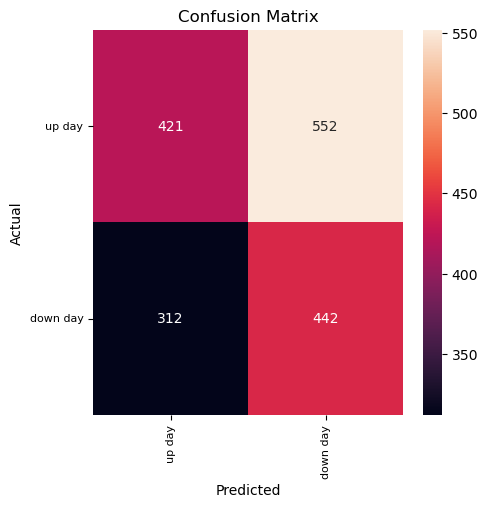

In [31]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()

## Expanding Markov Models for Market States

To create a comprehensive market analysis using Markov models, we need to define state spaces that represent different market conditions and then model the transition probabilities between those states.

### Trend States
For trend states, categorize price movements as follows:

- **Uptrend (Bull Market):** Successive higher highs and higher lows.
- **Downtrend (Bear Market):** Successive lower highs and lower lows.
- **Sideways/Horizontal Trend (Range-bound Market):** Prices within a certain percentage of a moving average.

Calculate transition probabilities to move from one trend state to another.

### Volatility States
Quantify volatility using statistical measures:

- **High Volatility:** Based on a high standard deviation or average true range (ATR).
- **Low Volatility:** Based on a low standard deviation or ATR.

Determine transition probabilities between high and low volatility states.

### Volume States
Volume states are based on trading activity:

- **High Volume:** Significantly above the historical average.
- **Low Volume:** Significantly below the historical average.

Model the likelihood of transitions between high and low volume states.

### Market Sentiment States
Sentiment states are derived from text analysis of news and social media:

- **Bullish:** Positive sentiment score.
- **Bearish:** Negative sentiment score.
- **Neutral:** Neutral sentiment score.

Create a transition matrix based on the changes in sentiment scores over time.

### Economic States
Economic states are informed by macroeconomic indicators:

- **Expansion:** Characterized by increased industrial production, sales, and incomes.
- **Recession:** Marked by falling GDP, rising unemployment, and reduced trade and industrial production.
- **Recovery:** Economic activity is starting to pick up but has not yet reached normal levels.
- **Peak:** The height of an economic expansion, when the economy is performing at its maximum output.

Compute transition probabilities between these states, using historical data to define the likelihood of moving from one economic state to another.

### Market Phase States
Market phases reflect the behavior of investors:

- **Accumulation Phase:** Informed investors start to buy or sell, anticipating the next market movement.
- **Public Participation/Markup Phase:** The public begins to enter the market, pushing prices up.
- **Distribution Phase:** Informed investors start to sell their positions; the market may start to reverse.
- **Panic/Liquidation Phase:** Rapid price declines due to widespread panic or forced selling.

Build a transition matrix that models the probability of moving from one phase to the next.

### Liquidity States
Liquidity is a measure of market activity:

- **Liquid Market:** There are enough orders for buying and selling without significant price changes.
- **Illiquid Market:** A lack of market participants, leading to price slippage and difficulty in entering or exiting positions.

Create a transition matrix that captures the probabilities of shifting between liquid and illiquid market states.

Each model should:

1. **Define the state space** based on historical data.
2. **Compute transition probabilities** based on observed transitions.
3. **Build a Markov model** using these probabilities.
4. **Validate the model** with a test dataset and refine as needed.

> Note: Economic and sentiment data may not be as frequently updated as price data, and state changes may occur less often. Markov models assume that the future state depends only on the current state, not the sequence of past events.

### Data Sources and Libraries

To build these models, you'll need access to various data sources and may need to utilize several libraries:

#### Trend States
- **Libraries:** `pandas` for data manipulation, `numpy` for numerical operations.
- **Data Sources:** Price data from APIs like `yfinance` or `Alpha Vantage`.

#### Volatility States
- **Libraries:** `ta` (technical analysis library) for calculating volatility indicators like ATR.
- **Data Sources:** Historical price data to calculate volatility.

#### Volume States
- **Libraries:** `pandas` for analyzing volume data.
- **Data Sources:** Trading volume data from financial market data providers.

#### Market Sentiment States
- **Libraries:** `textblob` or `NLTK` for sentiment analysis, `beautifulsoup4` for web scraping.
- **Data Sources:** News APIs like `NewsAPI`, social media APIs, analyst reports.

#### Economic States
- **Libraries:** `pandas-datareader` for economic indicators.
- **Data Sources:** Economic data from sources like the Federal Reserve Economic Data (FRED) or `Quandl`.

#### Market Phase States
- **Libraries:** `pandas` for data manipulation, `matplotlib` and `seaborn` for visualization to help identify phases.
- **Data Sources:** Price and volume data from market data APIs.

#### Liquidity States
- **Libraries:** Custom functions to calculate liquidity metrics such as the bid-ask spread.
- **Data Sources:** Order book data from market exchanges or financial data platforms.

### Implementation Steps

1. **Data Collection:** Use the appropriate APIs and libraries to gather historical data.
2. **State Definition:** Define states based on the data collected and the specific market conditions you are analyzing.
3. **Model Building:** Utilize `pandas` and `numpy` to build the transition matrix for the Markov model.
4. **Model Evaluation:** Use metrics such as accuracy, precision, recall, or the F1 score to evaluate the model's performance.
5. **Visualization:** Plot the results with `matplotlib` or `seaborn` to visualize the state transitions and model performance.

Remember that market data can be noisy and contain non-stationary signals. It's crucial to preprocess and clean your data thoroughly before building predictive models. Additionally, always be aware of the potential for overfitting when working with historical market data.


# Sideways/Horizontal Trend (Range-bound Market):

In [32]:
_SPY_DATA_

,index,YourIndexName,Date,Open,High,Low,Close,Adj Close,Volume
0,0,15097,2010-01-04,112.370003,113.389999,111.510002,113.330002,87.129929,118944600
1,1,15098,2010-01-05,113.260002,113.680000,112.849998,113.629997,87.360588,111579900
2,2,15099,2010-01-06,113.519997,113.989998,113.430000,113.709999,87.422112,116074400
3,3,15100,2010-01-07,113.500000,114.330002,113.180000,114.190002,87.791145,131091100
4,4,15101,2010-01-08,113.889999,114.620003,113.660004,114.570000,88.083282,126402800
...,...,...,...,...,...,...,...,...,...
3543,3543,18640,2024-02-01,484.630005,489.230011,483.799988,489.200012,489.200012,91891600
3544,3544,18641,2024-02-02,489.649994,496.049988,489.299988,494.350006,494.350006,99147700
3545,3545,18642,2024-02-05,493.700012,494.380005,490.230011,492.549988,492.549988,75757100
3546,3546,18643,2024-02-06,493.519989,494.320007,492.049988,493.980011,493.980011,55801600


In [33]:
import pandas as pd
import numpy as np

# Assuming _SPY_DATA_ is your DataFrame and contains a 'Close' column with closing prices
window_size = 20  # This is an example window size for the moving average
threshold = 0.01  # Threshold percentage to define Sideways/Horizontal trend

# Calculate the moving average
_SPY_DATA_['Moving_Average'] = _SPY_DATA_['Close'].rolling(window=window_size).mean()

# Define the states - 'Up', 'Down', 'Sideways'
_SPY_DATA_['State'] = 'Sideways'  # Default to 'Sideways'
_SPY_DATA_['State'][_SPY_DATA_['Close'] > (1 + threshold) * _SPY_DATA_['Moving_Average']] = 'Up'
_SPY_DATA_['State'][_SPY_DATA_['Close'] < (1 - threshold) * _SPY_DATA_['Moving_Average']] = 'Down'

# Shift the states column to compare with the next day
_SPY_DATA_['Next_State'] = _SPY_DATA_['State'].shift(-1)

# Create the 3D transition matrix
transition_matrix = pd.crosstab(_SPY_DATA_['State'], _SPY_DATA_['Next_State'], normalize='index')

# Convert the matrix into a 3D matrix
# For simplicity, we are using a 2D matrix, as a true 3D matrix would require an additional dimension, such as time or another condition.
# If you require a true 3D matrix, please provide further details on the third dimension.

# Output the transition matrix
print(transition_matrix)


Next_State      Down  Sideways        Up
State                                   
Down        0.775956  0.219945  0.004098
Sideways    0.131859  0.697789  0.170352
Up          0.001882  0.129862  0.868256


C:\Users\Administrator\AppData\Local\Temp\ipykernel_22608\2827867655.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _SPY_DATA_['State'][_SPY_DATA_['Close'] > (1 + threshold) * _SPY_DATA_['Moving_Average']] = 'Up'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_22608\2827867655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _SPY_DATA_['State'][_SPY_DATA_['Close'] < (1 - threshold) * _SPY_DATA_['Moving_Average']] = 'Down'


In [34]:
import pandas as pd
import numpy as np

# Assuming _SPY_DATA_ is already defined and contains the 'Close' column
# Calculate a simple moving average (SMA) for a given window
window_size = 20  # Define the window size for the moving average
_SPY_DATA_['SMA'] = _SPY_DATA_['Close'].rolling(window=window_size).mean()

# Define thresholds for 'sideways' state as a percentage of the moving average
threshold_percentage = 0.01  # 1% above and below the moving average

# Define the 'up', 'down', and 'sideways' states
_SPY_DATA_['State'] = np.where(_SPY_DATA_['Close'] > _SPY_DATA_['SMA'] * (1 + threshold_percentage), 'up',
                   np.where(_SPY_DATA_['Close'] < _SPY_DATA_['SMA'] * (1 - threshold_percentage), 'down', 'sideways'))

# Shift the 'State' column to get the 'next_state'
_SPY_DATA_['Next_State'] = _SPY_DATA_['State'].shift(-1)

# Drop the rows where 'Next_State' is NaN due to the shift operation
_SPY_DATA_.dropna(subset=['Next_State'], inplace=True)

# Initialize a 3D matrix for transitions with dimensions for each state
states = ['up', 'down', 'sideways']
transition_matrix = np.zeros((len(states), len(states), len(states)))

# Populate the 3D transition matrix
for i, trend in enumerate(states):
    for j, state in enumerate(states):
        for k, next_state in enumerate(states):
            transition_matrix[i, j, k] = len(_SPY_DATA_[(_SPY_DATA_['State'] == state) & 
                                                     (_SPY_DATA_['Next_State'] == next_state) & 
                                                     (_SPY_DATA_['State'].shift(1) == trend)])

# Convert counts to probabilities by dividing by the sum over the last axis
transition_matrix /= transition_matrix.sum(axis=2, keepdims=True)

# Handle any divisions by zero that occur if a state doesn't appear in the data
transition_matrix = np.nan_to_num(transition_matrix)


In [35]:
_SPY_DATA_

,index,YourIndexName,Date,Open,High,Low,Close,Adj Close,Volume,Moving_Average,State,Next_State,SMA
0,0,15097,2010-01-04,112.370003,113.389999,111.510002,113.330002,87.129929,118944600,NaN,sideways,sideways,NaN
1,1,15098,2010-01-05,113.260002,113.680000,112.849998,113.629997,87.360588,111579900,NaN,sideways,sideways,NaN
2,2,15099,2010-01-06,113.519997,113.989998,113.430000,113.709999,87.422112,116074400,NaN,sideways,sideways,NaN
3,3,15100,2010-01-07,113.500000,114.330002,113.180000,114.190002,87.791145,131091100,NaN,sideways,sideways,NaN
4,4,15101,2010-01-08,113.889999,114.620003,113.660004,114.570000,88.083282,126402800,NaN,sideways,sideways,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3542,3542,18639,2024-01-31,488.619995,489.079987,482.859985,482.880005,482.880005,126011100,479.119002,sideways,up,479.119002
3543,3543,18640,2024-02-01,484.630005,489.230011,483.799988,489.200012,489.200012,91891600,480.139502,up,up,480.139502
3544,3544,18641,2024-02-02,489.649994,496.049988,489.299988,494.350006,494.350006,99147700,481.493002,up,up,481.493002
3545,3545,18642,2024-02-05,493.700012,494.380005,490.230011,492.549988,492.549988,75757100,482.724501,up,up,482.724501
